In [42]:
#basic package
import tqdm
import os
import numpy as np
import glob
import random
import pandas as pd
import sys
import time
import datetime as dt
import itertools
import re
import math
from collections import Counter
import operator
from scipy.stats import entropy
import networkit as nk #more efficient
import pickle
import statistics
from sklearn.utils import shuffle
from scipy.stats import pearsonr, spearmanr

#plot
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

In [43]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
from UTILS import preprocessing_Origins,is_day,time_series_henColumn_tsRow, is_WG_open, is_day
import config_exp2 as config

In [44]:
print('change the configuration file if not done yet!')
path_extracted_data = config.path_extracted_data
path_initial_data = config.path_initial_data
id_run = config.id_run
dico_matching = config.dico_matching
li_tracking_date = config.li_tracking_date
print(id_run)
path_extracted_data_visual = os.path.join(path_extracted_data,'LongformatModels')
#create a director if not existing
if not os.path.exists(path_extracted_data_visual):
    os.makedirs(path_extracted_data_visual)

change the configuration file if not done yet!
EXP2_


In [45]:
path_extracted_data

'G:\\VPHI\\Welfare\\2- Research Projects\\Camille Montalcini\\Origins.GS\\DataOutput\\TrackingSystem\\EXP2_'

In [46]:
#with weight on the edge: TODO AND READ
#https://stellargraph.readthedocs.io/en/stable/demos/node-classification/node2vec-weighted-node-classification.html

# Info on inital data

In [47]:
#initial data at the day level
df_longformatallday = pd.read_csv(os.path.join(path_extracted_data,'df_longformatALLdaily.csv'),sep=',')
print(df_longformatallday.shape)
display(df_longformatallday.head(3))

(11235, 30)


,VTDperhour,zonecrossed2transition,severity,gap,HenID,PenID,early_death,ExperimentID,DOA,time2event,...,PropZ5,dur_values_norm,unevenness,Dataset1,Dataset2,Dataset3,DOAHA,MonthInstudy,PenIDinit,id
0,3.185185,1.000000,0.0,0.0,EXP2_hen_1,pen10,0.0,Exp2,167,7,...,0.020144,"[0.0, 0.6616872427983539, 0.24927983539094645,...",0.608863,0,0,1,174,0.85,pen10,376
1,3.555556,1.066667,0.0,0.0,EXP2_hen_1,pen10,0.0,Exp2,168,6,...,0.214486,"[0.0, 0.5069135802469136, 0.21220164609053496,...",0.455501,0,0,1,174,0.85,pen10,376
2,4.592593,1.000000,0.0,0.0,EXP2_hen_1,pen10,0.0,Exp2,169,5,...,0.068025,"[0.0, 0.5901440329218107, 0.27195473251028807,...",0.531887,0,0,1,174,0.85,pen10,376


df_longformatallday.groupby('ExperimentID')['PenID'].value_counts()

In [48]:
li_prop = [i for i in df_longformatallday.columns if i.startswith('Prop')]
dico_prop_name = {'PropZ1':'WG', 'PropZ2':'literred floor','PropZ3':'lower tier','PropZ4':'nestbox tier','PropZ5':'top tier'}
li_prop

['PropZ1', 'PropZ2', 'PropZ3', 'PropZ4', 'PropZ5']

#visual
df_plt = df_longformatallday.copy()
df_plt.rename(columns={'severity': 'KBF severity'}, inplace=True)
for i in li_prop:
    plt.figure(figsize=(5,3.2))
    sns.scatterplot(y='unevenness', x=i, hue='KBF severity', data=df_plt, palette=sns.color_palette("coolwarm", as_cmap=True),
                    alpha=0.2);
    plt.xlabel('Proportion of time spent in '+dico_prop_name[i])
    plt.savefig(os.path.join(path_extracted_data_visual,'scatterplot_unevenness_'+i+'.png'),dpi=300,format='png',bbox_inches='tight')
    plt.show()

#visual
df_plt = df_longformatallday.copy()
df_plt.rename(columns={'severity': 'KBF severity'}, inplace=True)
for i in li_prop:
    plt.figure(figsize=(5,3.2))
    plt.scatter(y=df_plt['unevenness'], x=df_plt[i], c=df_plt['KBF severity'], s=4,cmap='coolwarm',alpha=0.2);
    cbar = plt.colorbar()
    plt.ylabel('unevenness',size=12)
    plt.xlabel('Proportion of time spent in '+dico_prop_name[i], size=12)
    plt.savefig(os.path.join(path_extracted_data_visual,'scatterplot_unevenness_'+i+'.png'),dpi=300,format='png',bbox_inches='tight')
    plt.show()

(100, 7)


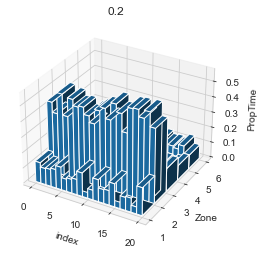

(100, 7)


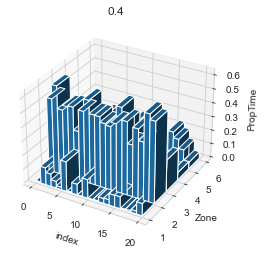

(100, 7)


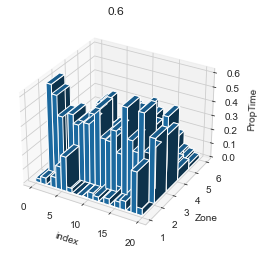

(100, 7)


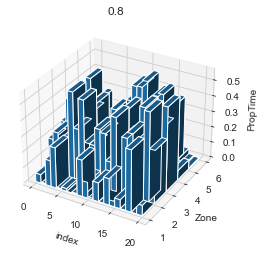

(100, 7)


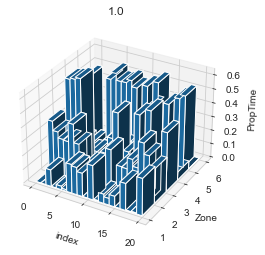

(100, 7)


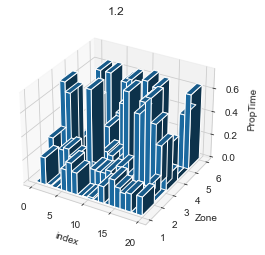

(100, 7)


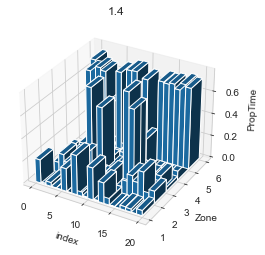

(100, 7)


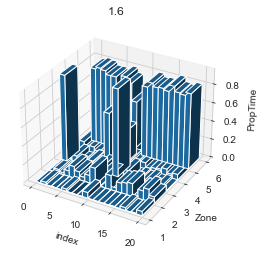

(100, 7)


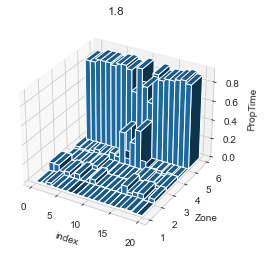

(100, 7)


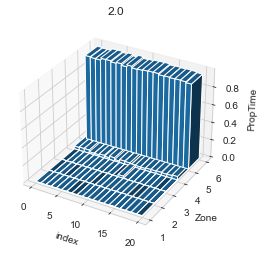

(200, 9)


,unevenness,DOA,severity,PropZ1,PropZ2,PropZ3,PropZ4,PropZ5,index
16,0.2,169,0.0,0.135288,0.457407,0.230494,0.099115,0.077695,0
4639,0.2,412,30.0,0.107000,0.393815,0.197019,0.096630,0.205537,1


C:\Users\camil\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\camil\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


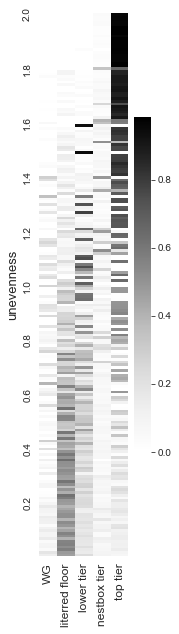

In [49]:
li_df = []
nbr = 20
rs = 0
df_plt_ = df_longformatallday[['unevenness','DOA','severity']+li_prop].copy()
df_plt_['unevenness'] = df_plt_['unevenness'].map(lambda x: round(x,1))
df_plt_ = shuffle(df_plt_, random_state=rs)
for i in range(0,25,2):
    df_plt = df_plt_.copy()
    df_plt = df_plt[df_plt['unevenness']==i/10].iloc[0:nbr]
    if df_plt.shape[0]==nbr:
        fig = plt.figure()
        ax1 = fig.add_subplot(111, projection='3d')
        li_df.append(df_plt)
        df_plt['index'] = range(0,df_plt.shape[0])
        df_plt = pd.melt(df_plt, id_vars=['DOA','unevenness','severity','index'], value_vars=li_prop, value_name='PropTime')
        df_plt['Zone'] = df_plt['variable'].map(lambda x: int(re.findall(r'\d+',x)[0]))
        #df_plt.sort_values('',inplace=True, ascending=False)
        print(df_plt.shape)
        df_plt.head(2)
        x3 = df_plt['index'].tolist()
        y3 = df_plt['Zone'].tolist() 
        z3 = np.zeros(len(x3)) #start at 0 on the z axis

        #x, dy, dz represent the width, depth, and height (dimensions in x, y and z)
        dx = np.ones(len(x3))
        dy = np.ones(len(x3))
        dz = df_plt['PropTime'].tolist() #chose the height of the z axis
        ax1.bar3d(x3, y3, z3, dx, dy, dz)
        ax1.set_xlabel('index')
        ax1.set_ylabel('Zone')
        ax1.set_zlabel('PropTime')
        plt.title(i/10)
        plt.show()
df_hm = pd.concat([li_df[0],li_df[1]])
for i in range(2,len(li_df)):
    df_hm = pd.concat([df_hm,li_df[i]])
print(df_hm.shape)
display(df_hm.head(2))
df_hm.sort_values('unevenness',ascending=False,inplace=True)
li_prop = ['PropZ1','PropZ2','PropZ3','PropZ4','PropZ5']
M = df_hm[li_prop]

plt.figure(figsize=(2,10))
sns.heatmap(M, xticklabels=[dico_prop_name[i] for i in li_prop], 
            yticklabels=[df_hm['unevenness'].tolist()[i] if i%20==0 else '' for i in range(0,df_hm.shape[0])], 
            cmap='Greys',annot=False) #to annotate value in each cell
#cmap=sns.color_palette("coolwarm", as_cmap=True)
plt.xticks(rotation=90, size=12)
plt.ylabel('unevenness', size=13)
plt.savefig(os.path.join(path_extracted_data_visual,'Heatmap_unevenness_'+str(rs)+'.png'),dpi=300,format='png',bbox_inches='tight')
plt.show()

In [50]:
#compared to the daily mean? mean of another flock? of all data? 
#or square meter to use no other prior info than the structure itself? easier to interpret, thats what I'll do
df_longformatallday[li_prop].describe()

,PropZ1,PropZ2,PropZ3,PropZ4,PropZ5
count,11235.000000,11235.000000,11235.000000,11235.000000,11235.000000
mean,0.052903,0.340237,0.239501,0.081290,0.286069
std,0.074664,0.189262,0.165888,0.062900,0.272547
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.184231,0.116791,0.045883,0.046236
50%,0.017833,0.358450,0.220556,0.065675,0.202593
75%,0.073713,0.492973,0.323832,0.096485,0.472524
max,0.497808,0.839528,0.997552,0.811750,1.000000


In [51]:
#check nbr of obs involved in the mean
df_ = df_longformatallday.groupby(['ExperimentID','HenID','HAID'])['DOA'].agg(lambda x:sorted(x)).reset_index()
df_['nbr daily obs'] = df_['DOA'].map(lambda x: len(x))
df_['DOA'] = df_['DOA'].map(lambda x: ' '.join([str(i) for i in x])) 
display(df_.head(3))
display(df_.groupby('ExperimentID')['nbr daily obs'].describe())

#for each hen individualy
print('-----------for each hen individualy...')
df_ = df_.groupby(['ExperimentID','DOA'])[['HenID']].count().reset_index()
df_.to_csv(os.path.join(path_extracted_data,'Info_fromdailytomean.csv'), index=False, sep=',')
display(df_[df_['ExperimentID']=='Exp1']) #OFH
display(df_[df_['ExperimentID']=='Exp2']) #this study
display(df_[df_['ExperimentID']=='Exp3']) #rufener

,ExperimentID,HenID,HAID,DOA,nbr daily obs
0,Exp1,EXP1_hen_10,HA1,166 167 168 169 170 171 172,7
1,Exp1,EXP1_hen_10,HA2,208 209 211 212 213 214,6
2,Exp1,EXP1_hen_10,HA3,241 242,2


,count,mean,std,min,25%,50%,75%,max
ExperimentID,,,,,,,,
Exp1,658.0,5.501520,1.774373,1.0,5.0,6.0,7.0,7.0
Exp2,638.0,6.547022,1.022578,1.0,6.0,7.0,7.0,7.0
Exp3,593.0,5.797639,0.560099,1.0,6.0,6.0,6.0,6.0


-----------for each hen individualy...


,ExperimentID,DOA,HenID
0,Exp1,166 167 168 169 170 171 172,135
1,Exp1,208 209 211 212 213 214,152
2,Exp1,241 242,118
3,Exp1,306 307 308 309 310 311 312,84
4,Exp1,306 307 308 309 310 312,1
5,Exp1,306 307 308 309 311 312,1
6,Exp1,308 309 310 311 312,48
7,Exp1,308 309 311 312,3
8,Exp1,411,1
9,Exp1,411 412,1


,ExperimentID,DOA,HenID
17,Exp2,167 168 169 170 171 172 173,159
18,Exp2,238 239 240,39
19,Exp2,238 239 240 241 242 243,119
20,Exp2,239 240 241 242 243,1
21,Exp2,300,1
22,Exp2,300 301 302 303 304 305 306,161
23,Exp2,300 301 302 303 304 306,1
24,Exp2,384 385 386 387 388,1
25,Exp2,384 385 386 387 388 389 390,155
26,Exp2,384 387 388 390,1


,ExperimentID,DOA,HenID
27,Exp3,142 143 144 145 146 147,19
28,Exp3,150 151 152 153,1
29,Exp3,150 151 152 153 154,2
30,Exp3,150 151 152 153 154 155,31
31,Exp3,150 151 152 154 155,2
32,Exp3,150 151 153 154 155,1
33,Exp3,150 153 154 155,2
34,Exp3,163 164 165 166 167 168,19
35,Exp3,171 172 173 174 175 176,40
36,Exp3,184 185 186 187 188 189,20


In [52]:
df_.sort_values('HenID', ascending=False).head(40)

,ExperimentID,DOA,HenID
22,Exp2,300 301 302 303 304 305 306,161
17,Exp2,167 168 169 170 171 172 173,159
25,Exp2,384 385 386 387 388 389 390,155
1,Exp1,208 209 211 212 213 214,152
0,Exp1,166 167 168 169 170 171 172,135
19,Exp2,238 239 240 241 242 243,119
2,Exp1,241 242,118
11,Exp1,411 412 413 414 415 416,107
3,Exp1,306 307 308 309 310 311 312,84
6,Exp1,308 309 310 311 312,48


In [53]:
df_longformatallday['daytimeduration'].describe()

count    11235.000000
mean        14.912995
std          0.850505
min         13.500000
25%         14.000000
50%         15.000000
75%         16.000000
max         16.000000
Name: daytimeduration, dtype: float64

# info on data used in models

In [54]:
#initial data
df_longformat = pd.read_csv(os.path.join(path_extracted_data,'df_longformatALL.csv'),sep=',')
print(df_longformat.shape)
display(df_longformat.head(3))

(2246, 26)


,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ4,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,severity,gap,weight
0,created,EXP3_hen_93,pen4,1,0.00,148,0,Exp3,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HA2B,EXP3_hen_93,pen4,1,0.95,177,0,Exp3,0,1,...,0.077633,0.174229,0.067145,0.214326,2.270833,1.056667,0.970769,0.0,0.0,NaN
2,HA3B,EXP3_hen_93,pen4,1,1.64,198,0,Exp3,0,1,...,0.076175,0.323953,0.100821,0.131769,2.437500,1.040000,0.846872,19.0,1.0,NaN


In [55]:
li_prop = [i for i in df_longformat.columns if i.startswith('Prop')]
dico_prop_name = {'PropZ1':'WG', 'PropZ2':'literred floor','PropZ3':'lower tier','PropZ4':'nestbox tier','PropZ5':'top tier'}
li_prop

['PropZ5', 'PropZ4', 'PropZ3', 'PropZ2', 'PropZ1']

,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ4,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,KBF severity,gap,weight
1,HA2B,EXP3_hen_93,pen4,1,0.95,177,0,Exp3,0,1,...,0.077633,0.174229,0.067145,0.214326,2.270833,1.056667,0.970769,0.0,0.0,NaN
1704,HA3,EXP2_hen_103,pen9,266,5.23,307,0,Exp2,1,0,...,0.062667,0.294456,0.603571,0.004178,4.877551,NaN,0.622253,0.0,0.0,1739.9


C:\Users\camil\AppData\Local\Temp/ipykernel_8788/2336464901.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


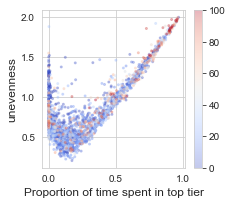

C:\Users\camil\AppData\Local\Temp/ipykernel_8788/2336464901.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


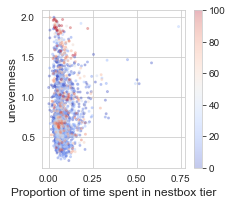

C:\Users\camil\AppData\Local\Temp/ipykernel_8788/2336464901.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


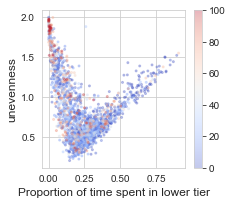

C:\Users\camil\AppData\Local\Temp/ipykernel_8788/2336464901.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


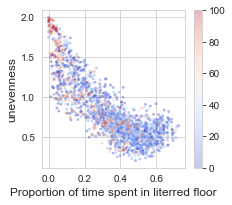

C:\Users\camil\AppData\Local\Temp/ipykernel_8788/2336464901.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


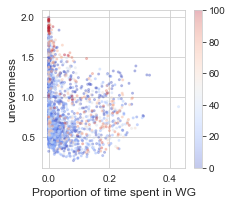

In [56]:
# visual
df_plt = df_longformat.copy()
df_plt.rename(columns={'severity': 'KBF severity'}, inplace=True)
df_plt = df_plt.sort_values('KBF severity')
display(df_plt.head(2))
for i in li_prop:
    #plt.figure(figsize=(5,3.2))
    plt.figure(figsize=(3.2,2.9))
    plt.scatter(y=df_plt['unevenness'], x=df_plt[i], c=df_plt['KBF severity'], s=4,cmap='coolwarm',alpha=0.3);
    cbar = plt.colorbar()
    plt.ylabel('unevenness',size=12)
    plt.xlabel('Proportion of time spent in '+dico_prop_name[i], size=12)
    plt.savefig(os.path.join(path_extracted_data_visual,'scatterplot_unevenness_'+i+'.png'),dpi=300,format='png',bbox_inches='tight')
    plt.show()

,HAID,HenID,PenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Dataset1,...,PropZ4,PropZ3,PropZ2,PropZ1,VTDperhour,zonecrossed2transition,unevenness,KBF severity,gap,weight
1,HA2B,EXP3_hen_93,pen4,1,0.95,177,0,Exp3,0,1,...,0.077633,0.174229,0.067145,0.214326,2.270833,1.056667,0.970769,0.0,0.0,NaN
1704,HA3,EXP2_hen_103,pen9,266,5.23,307,0,Exp2,1,0,...,0.062667,0.294456,0.603571,0.004178,4.877551,NaN,0.622253,0.0,0.0,1739.9


C:\Users\camil\AppData\Local\Temp/ipykernel_8788/3183451574.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


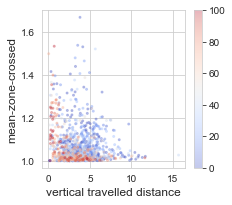

In [57]:
#visual
#note that we cant highlight the movement from the raw data plot showing min and max examples of VTD and mean-zone-crossed,
#as here its the mean over the mvt previosu HA and not a single one
df_plt = df_longformat.copy()
df_plt.rename(columns={'severity': 'KBF severity'}, inplace=True)
df_plt = df_plt.sort_values('KBF severity')
display(df_plt.head(2))
plt.figure(figsize=(3.2,2.9))
plt.scatter(y=df_plt['zonecrossed2transition'], x=df_plt['VTDperhour'], c=df_plt['KBF severity'], s=4,cmap='coolwarm',alpha=0.3);
cbar = plt.colorbar()
plt.xlabel('vertical travelled distance', size=12)
plt.ylabel('mean-zone-crossed', size=12)
plt.savefig(os.path.join(path_extracted_data_visual,'scatterplot_mvtbehaviours.png'),dpi=300,format='png',bbox_inches='tight')
plt.show()

In [58]:
df_longformat[['zonecrossed2transition','VTDperhour','PropZ5','severity']]

,zonecrossed2transition,VTDperhour,PropZ5,severity
0,NaN,NaN,NaN,NaN
1,1.056667,2.270833,0.466667,0.0
2,1.040000,2.437500,0.367281,19.0
3,1.004000,3.350000,0.197112,10.0
4,1.018333,1.875000,0.326522,9.0
...,...,...,...,...
2241,NaN,NaN,NaN,NaN
2242,NaN,3.680272,0.142936,0.0
2243,NaN,5.142857,0.136524,0.0
2244,NaN,5.112245,0.129977,1.0


In [59]:
#final data
display(df_longformat.groupby(['ExperimentID','HAID'])[['DOAHA','MonthInstudy']].agg(lambda x: sorted(set(x))).reset_index())

,ExperimentID,HAID,DOAHA,MonthInstudy
0,Exp1,HA1,[173],[0.82]
1,Exp1,HA2,[215],[2.2]
2,Exp1,HA3,[243],[3.12]
3,Exp1,HA4,[313],[5.42]
4,Exp1,HA5,[418],[8.88]
5,Exp1,created,[148],[0.0]
6,Exp2,HA1,[174],[0.85]
7,Exp2,HA2,[244],[3.16]
8,Exp2,HA3,[307],[5.23]
9,Exp2,HA4,[391],[7.99]


In [60]:
(1945-1875 )/(404-372+1)

2.121212121212121

We used in subsequent analysis 376 hens, with a total of 1889 observations and where hens' age vary from DOA 148 to DOA 437
------------------------------------------------------------------------- Exp1
(811, 26)
(658, 26)


C:\Users\camil\AppData\Local\Temp/ipykernel_8788/194537232.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for expid,df_ in df_longformat.groupby(['ExperimentID']):


,HenID,DOAHA,nbrDaysTracked
76,EXP1_hen_191,"[215, 313, 418]",3
44,EXP1_hen_154,"[173, 215, 243]",3
97,EXP1_hen_34,"[173, 215, 243]",3


,HenID,DOAHA,nbrDaysTracked
38,EXP1_hen_149,"[173, 215, 243, 313, 418]",5
96,EXP1_hen_32,"[173, 215, 243, 313, 418]",5
0,EXP1_hen_10,"[173, 215, 243, 313, 418]",5


4.300653594771242
In experiment Exp1 hens had on average 4 (± 0.76) days tracked with a minimum of 3 days tracked and a max of 5 days (153 hens ; total observations: 658)
------------------------------------------------------------------------- Exp2
(801, 26)
(638, 26)


,HenID,DOAHA,nbrDaysTracked
22,EXP2_hen_119,"[174, 307, 391]",3
107,EXP2_hen_48,"[174, 244, 307]",3
133,EXP2_hen_72,"[174, 307, 391]",3


,HenID,DOAHA,nbrDaysTracked
60,EXP2_hen_156,"[174, 244, 307, 391]",4
53,EXP2_hen_15,"[174, 244, 307, 391]",4
162,EXP2_hen_99,"[174, 244, 307, 391]",4


3.914110429447853
In experiment Exp2 hens had on average 4 (± 0.28) days tracked with a minimum of 3 days tracked and a max of 4 days (163 hens ; total observations: 638)
------------------------------------------------------------------------- Exp3
(634, 26)
(593, 26)


,HenID,DOAHA,nbrDaysTracked
34,EXP3_hen_54,"[169, 190, 218, 246]",4
32,EXP3_hen_52,"[148, 169, 190, 218]",4
27,EXP3_hen_47,"[148, 169, 190, 218]",4


,HenID,DOAHA,nbrDaysTracked
6,EXP3_hen_106,"[156, 177, 198, 225, 254, 282, 325, 345, 373, ...",11
5,EXP3_hen_105,"[156, 177, 198, 225, 254, 282, 325, 345, 373, ...",11
59,EXP3_hen_99,"[156, 177, 198, 225, 254, 282, 325, 345, 373, ...",11


9.883333333333333
In experiment Exp3 hens had on average 10 (± 1.73) days tracked with a minimum of 4 days tracked and a max of 11 days (60 hens ; total observations: 593)


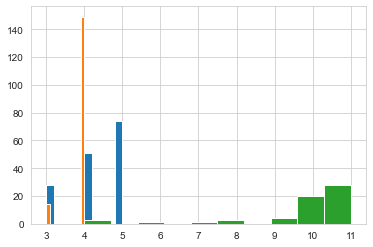

In [61]:
#some numbers
mi = min(df_longformat['DOAHA'].tolist())
ma = max(df_longformat['DOAHA'].tolist())
print('We used in subsequent analysis %d hens, with a total of %d observations and where hens\' age vary from DOA %d to DOA %d'%(len(df_longformat['HenID'].unique()),
                                                                                      df_longformat[df_longformat['HAID']!='created'].shape[0],mi, ma))

for expid,df_ in df_longformat.groupby(['ExperimentID']):
    print('------------------------------------------------------------------------- '+expid)
    print(df_.shape)
    df_plt = df_[df_['HAID']!='created']
    print(df_plt.shape)
    #check #obs/hen
    df_info = df_plt.groupby(['HenID'])['DOAHA'].agg(lambda x: list(x)).reset_index()
    df_info['nbrDaysTracked'] = df_info['DOAHA'].map(lambda x: len(set(x)))
    df_info = df_info.sort_values(['nbrDaysTracked'])
    display(df_info.head(3))
    display(df_info.tail(3))
    print(df_info['nbrDaysTracked'].mean())
    plt.hist(df_info['nbrDaysTracked'].tolist())
    print('In experiment %s hens had on average %d (± %.2f) days tracked with a minimum of %d days tracked and a max of %d days (%d hens ; total observations: %d)'%(expid, 
           round(df_info['nbrDaysTracked'].mean(),0),
           round(df_info['nbrDaysTracked'].std(),2),
           df_info['nbrDaysTracked'].min(),df_info['nbrDaysTracked'].max(), df_info.shape[0], df_plt.shape[0]))

In [62]:
dico_exp_data = {'Exp1':'Dataset2', 'Exp2':'Dataset3', 'Exp3':'Dataset1'}
df_longformat['DatasetID'] = df_longformat['ExperimentID'].map(lambda x: dico_exp_data[x])

In [63]:
df_longformat['ExperimentID'].unique()

array(['Exp3', 'Exp1', 'Exp2'], dtype=object)

In [64]:
df_plt = df_longformat.copy()
df_ = df_plt[~df_plt['severity'].isnull()].groupby('MonthInstudy')['DatasetID'].agg(lambda x: len(set(x))==1).reset_index()

In [65]:
df_

,MonthInstudy,DatasetID
0,0.00,True
1,0.26,True
2,0.69,True
3,0.82,True
4,0.85,True
5,0.95,True
6,1.38,True
7,1.64,True
8,2.20,True
9,2.30,True


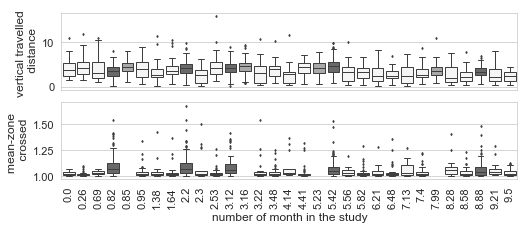

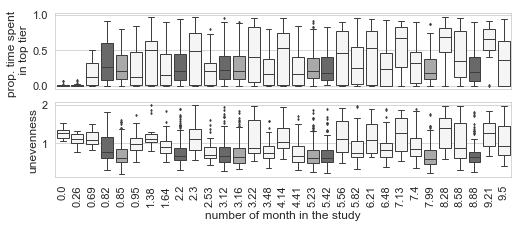

In [66]:
df_plt = df_longformat[df_longformat['HAID']!='created'].copy()
df_ = df_plt.groupby('MonthInstudy')['DatasetID'].agg(lambda x: len(set(x))==1).reset_index()
#therefore lets take a dico
dico_month_exp = dict(zip(df_plt['MonthInstudy'],df_plt['DatasetID']))
dico_exp_color = {'Dataset1':'whitesmoke','Dataset3':'darkgrey','Dataset2':'dimgrey'}
my_pal = {x:dico_exp_color[dico_month_exp[x]] for x in df_longformat.MonthInstudy.unique()}

li_dico_mvt_name = [{'VTDperhour':'vertical travelled \n distance',
                'zonecrossed2transition':'mean-zone \n crossed'},
                 {'PropZ5':'prop. time spent \n in top tier',
                'unevenness':'unevenness'}]
for dico_mvt_name, BHVtype in zip(li_dico_mvt_name,['movementBHV','SpaceUseBHV']):
    c = 1 ; l = 2 ; img_w = 7.3 ; img_h = 1.6
    fig = plt.figure(figsize=(img_w*c, img_h*l))
    i = 1
    for t,name in dico_mvt_name.items():
        plt.subplot(l,c,i)
        ax = sns.boxplot(y=t, x='MonthInstudy', data=df_plt, palette=my_pal, fliersize=1.5, linewidth=1) #hue='DatasetID', palette='Greys_r',
        #plt.axis('off');
        if i==1:
            plt.xticks([]) #remove xlabel annotations
            plt.xlabel('')
        if i==2:
            #li_ = df_plt['MonthInstudy'].tolist()
            #ax.set_xticks(df_plt['MonthInstudy'].tolist(), [li_[i] if i%% for i in range(len(li_))])
            plt.xlabel('number of month in the study', size=12)
        plt.xticks(fontsize=11,rotation=90)
        plt.yticks(fontsize=11)
        #plt.legend([],[], frameon=False)
        plt.ylabel(name, size=12)
        plt.tight_layout()
        i = i+1
    plt.savefig(os.path.join(path_extracted_data_visual,'All_overtime'+BHVtype+'.png'),dpi=300,format='png',bbox_inches='tight')

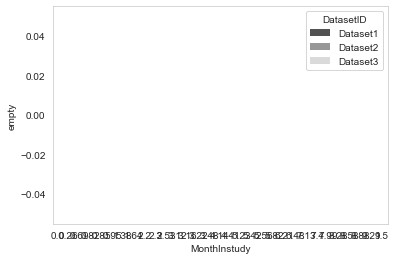

In [67]:
#just for color per experiment
df_plt['empty'] = 0
sns.boxplot(y='empty', x='MonthInstudy', data=df_plt, hue='DatasetID', palette='Greys_r', fliersize=0, linewidth=0) #hue='ExperimentID', palette='Greys_r',
plt.grid(False)
plt.savefig(os.path.join(path_extracted_data_visual,'expID_colorlegend.png'),dpi=300,format='png',bbox_inches='tight')

In [68]:
#any DOA with HA from two experiemnts?
df_longformat[df_longformat['HAID']!='created'].groupby('MonthInstudy')['ExperimentID'].agg(lambda x: set(x)).reset_index()

,MonthInstudy,ExperimentID
0,0.00,{Exp3}
1,0.26,{Exp3}
2,0.69,{Exp3}
3,0.82,{Exp1}
4,0.85,{Exp2}
5,0.95,{Exp3}
6,1.38,{Exp3}
7,1.64,{Exp3}
8,2.20,{Exp1}
9,2.30,{Exp3}


In [69]:
df_longformat[df_longformat['HAID']!='created'].groupby('MonthInstudy')['DatasetID'].agg(lambda x: set(x)).reset_index()

,MonthInstudy,DatasetID
0,0.00,{Dataset1}
1,0.26,{Dataset1}
2,0.69,{Dataset1}
3,0.82,{Dataset2}
4,0.85,{Dataset3}
5,0.95,{Dataset1}
6,1.38,{Dataset1}
7,1.64,{Dataset1}
8,2.20,{Dataset2}
9,2.30,{Dataset1}


In [70]:
#lets define time as the number of month sign the first KBF, and each time beeing representative of the day of KBF, 
#not the day of mvt
df_longformat[['ExperimentID','HAID']].value_counts().reset_index()

,ExperimentID,HAID,0
0,Exp2,HA3,163
1,Exp2,created,163
2,Exp2,HA1,159
3,Exp2,HA2,159
4,Exp2,HA4,157
5,Exp1,created,153
6,Exp1,HA2,152
7,Exp1,HA4,137
8,Exp1,HA1,135
9,Exp1,HA3,118


In [71]:
#altogether
df_longformat.sort_values(['DOAHA'], inplace=True)
df_ = df_longformat.groupby(['HenID','ExperimentID'])[['DOAHA','MonthInstudy','severity',
                                     'Dataset1','Dataset2','Dataset3','IsOFH']].agg(lambda x: list(x)).reset_index()
df_['DOAdiff'] = df_['DOAHA'].map(lambda x: [x[i+1]-x[i] for i in range(0,len(x)-1)])
df_['is_created'] = df_['severity'].map(lambda x: [math.isnan(i) for i in x])
df_['is_created'] = df_['is_created'].map(lambda x: str(x))
df_['DOAHA'] = df_['DOAHA'].map(lambda x: str(x))
df_['MonthInstudy'] = df_['MonthInstudy'].map(lambda x: str(x))
df_

,HenID,ExperimentID,DOAHA,MonthInstudy,severity,Dataset1,Dataset2,Dataset3,IsOFH,DOAdiff,is_created
0,EXP1_hen_10,Exp1,"[148, 173, 215, 243, 313, 418]","[0.0, 0.82, 2.2, 3.12, 5.42, 8.88]","[nan, 34.0, 30.0, 32.0, 38.0, 40.0]","[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]","[25, 42, 28, 70, 105]","[True, False, False, False, False, False]"
1,EXP1_hen_101,Exp1,"[148, 173, 215, 243, 313, 418]","[0.0, 0.82, 2.2, 3.12, 5.42, 8.88]","[nan, 0.0, 20.0, 16.0, 12.0, 28.0]","[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]","[25, 42, 28, 70, 105]","[True, False, False, False, False, False]"
2,EXP1_hen_102,Exp1,"[148, 173, 215, 243, 313, 418]","[0.0, 0.82, 2.2, 3.12, 5.42, 8.88]","[nan, 0.0, 44.0, 34.0, 54.0, 50.0]","[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]","[25, 42, 28, 70, 105]","[True, False, False, False, False, False]"
3,EXP1_hen_105,Exp1,"[148, 173, 215, 313]","[0.0, 0.82, 2.2, 5.42]","[nan, 2.0, 4.0, 12.0]","[0, 0, 0, 0]","[1, 1, 1, 1]","[0, 0, 0, 0]","[1, 1, 1, 1]","[25, 42, 98]","[True, False, False, False]"
4,EXP1_hen_106,Exp1,"[148, 173, 215, 313, 418]","[0.0, 0.82, 2.2, 5.42, 8.88]","[nan, 0.0, 0.0, 26.0, 10.0]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[25, 42, 98, 105]","[True, False, False, False, False]"
...,...,...,...,...,...,...,...,...,...,...,...
371,EXP3_hen_95,Exp3,"[148, 156, 177, 198, 225, 254, 282, 325, 345, ...","[0.0, 0.26, 0.95, 1.64, 2.53, 3.48, 4.41, 5.82...","[nan, 0.0, 0.0, 48.0, 46.0, 81.0, 74.0, 77.0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[8, 21, 21, 27, 29, 28, 43, 20, 28, 36, 28]","[True, False, False, False, False, False, Fals..."
372,EXP3_hen_96,Exp3,"[148, 156, 177, 198, 225, 254, 282, 325, 345, ...","[0.0, 0.26, 0.95, 1.64, 2.53, 3.48, 4.41, 5.82...","[nan, 0.0, 95.0, 100.0, 97.0, 93.0, 96.0, 95.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[8, 21, 21, 27, 29, 28, 43, 20, 28, 36]","[True, False, False, False, False, False, Fals..."
373,EXP3_hen_97,Exp3,"[148, 156, 177, 198, 225, 254, 282, 325, 345, ...","[0.0, 0.26, 0.95, 1.64, 2.53, 3.48, 4.41, 5.82...","[nan, 0.0, 0.0, 0.0, 90.0, 87.0, 96.0, 94.0, 9...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[8, 21, 21, 27, 29, 28, 43, 20, 28, 36, 28]","[True, False, False, False, False, False, Fals..."
374,EXP3_hen_98,Exp3,"[148, 156, 177, 198, 225, 254, 282, 325, 345, ...","[0.0, 0.26, 0.95, 1.64, 2.53, 3.48, 4.41, 5.82...","[nan, 0.0, 0.0, 0.0, 0.0, 10.0, 12.0, 87.0, 85...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[8, 21, 21, 27, 29, 28, 43, 20, 28, 36, 28]","[True, False, False, False, False, False, Fals..."


In [72]:
#table of the number of birds in each situations
df__ = df_.groupby(['ExperimentID','DOAHA','MonthInstudy','is_created'])['HenID'].count().reset_index()
df__['nbrobs'] = df__['is_created'].map(lambda x: len(eval(x))-sum(eval(x)))
df__.sort_values(['ExperimentID','HenID'], ascending=False)

,ExperimentID,DOAHA,MonthInstudy,is_created,HenID,nbrobs
15,Exp3,"[148, 156, 177, 198, 225, 254, 282, 325, 345, ...","[0.0, 0.26, 0.95, 1.64, 2.53, 3.48, 4.41, 5.82...","[True, False, False, False, False, False, Fals...",20,11
25,Exp3,"[148, 169, 190, 218, 246, 274, 317, 337, 365, ...","[0.0, 0.69, 1.38, 2.3, 3.22, 4.14, 5.56, 6.21,...","[False, False, False, False, False, False, Fal...",8,11
16,Exp3,"[148, 156, 177, 198, 225, 254, 282, 325, 345, ...","[0.0, 0.26, 0.95, 1.64, 2.53, 3.48, 4.41, 5.82...","[True, False, False, False, False, False, Fals...",5,10
17,Exp3,"[148, 156, 177, 198, 225, 254, 282, 325, 345, ...","[0.0, 0.26, 0.95, 1.64, 2.53, 3.48, 4.41, 5.82...","[True, False, False, False, False, False, Fals...",4,10
18,Exp3,"[148, 156, 177, 198, 225, 254, 282, 325, 345, ...","[0.0, 0.26, 0.95, 1.64, 2.53, 3.48, 4.41, 5.82...","[True, False, False, False, False, False, Fals...",3,10
22,Exp3,"[148, 156, 177, 198, 225, 254, 282, 345, 373, ...","[0.0, 0.26, 0.95, 1.64, 2.53, 3.48, 4.41, 6.48...","[True, False, False, False, False, False, Fals...",2,10
26,Exp3,"[148, 169, 190, 218, 246, 274, 317, 337, 365, ...","[0.0, 0.69, 1.38, 2.3, 3.22, 4.14, 5.56, 6.21,...","[False, False, False, False, False, False, Fal...",2,10
31,Exp3,"[148, 169, 190, 218]","[0.0, 0.69, 1.38, 2.3]","[False, False, False, False]",2,4
32,Exp3,"[148, 169, 190, 246, 274, 317, 337, 365, 400, ...","[0.0, 0.69, 1.38, 3.22, 4.14, 5.56, 6.21, 7.13...","[False, False, False, False, False, False, Fal...",2,10
19,Exp3,"[148, 156, 177, 198, 225, 254, 282, 325, 345, ...","[0.0, 0.26, 0.95, 1.64, 2.53, 3.48, 4.41, 5.82...","[True, False, False, False, False, False, Fals...",1,9


In [73]:
#show columns with max amount of nan
df_longformat.isna().sum(axis=0).sort_values().tail(15)

id                          0
MonthInstudy                0
PenID                       0
meanDOAmvt                357
PropZ5                    357
PropZ4                    357
PropZ2                    357
PropZ1                    357
VTDperhour                357
unevenness                357
severity                  357
gap                       357
PropZ3                    357
weight                    969
zonecrossed2transition    995
dtype: int64

In [74]:
#sns.boxplot(y='severity', x='gap', data=df_longformat);

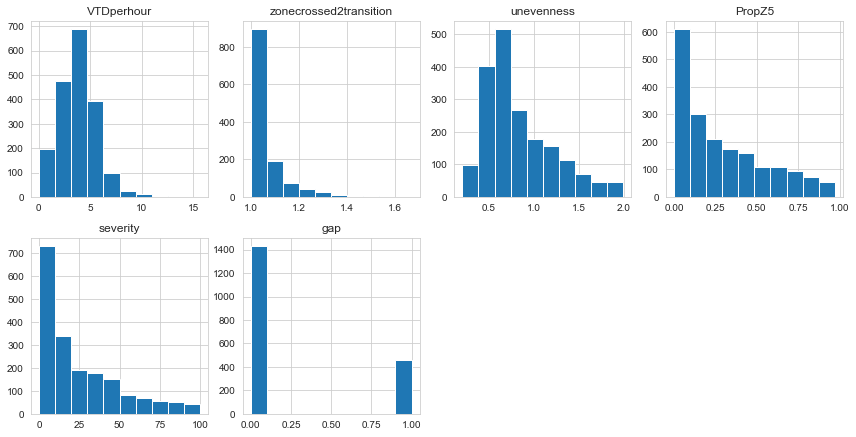

In [75]:
c = 4
li_mvtha = ['VTDperhour','zonecrossed2transition','unevenness','PropZ5','severity','gap']
l = len(li_mvtha)
fig = plt.figure(figsize=(3*c, 3*l))
for i,v in enumerate(li_mvtha):
    plt.subplot(l,c,i+1)
    plt.tight_layout()
    plt.hist(df_longformat[v]);
    plt.title(v)
    #plt.axis('off');

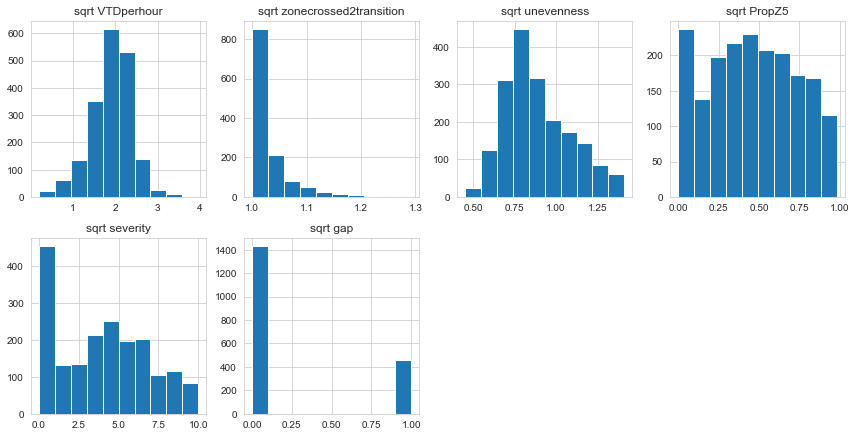

In [76]:
c = 4
l = len(li_mvtha)
fig = plt.figure(figsize=(3*c, 3*l))
for i,v in enumerate(li_mvtha):
    plt.subplot(l,c,i+1)
    plt.tight_layout()
    plt.hist(np.sqrt(df_longformat[v]));
    plt.title('sqrt '+v)
    #plt.axis('off');

In [77]:
df_longformat['ExperimentID'].value_counts()

Exp1    811
Exp2    801
Exp3    634
Name: ExperimentID, dtype: int64

In [78]:
df_longformat['zonecrossed2transition'].describe()

count    1251.000000
mean        1.061997
std         0.083849
min         1.000000
25%         1.011382
50%         1.030000
75%         1.080592
max         1.670196
Name: zonecrossed2transition, dtype: float64

In [79]:
df_longformat.groupby(['early_death','ExperimentID'])['HenID'].agg(lambda x: len(set(x))).reset_index()

,early_death,ExperimentID,HenID
0,0.0,Exp1,149
1,0.0,Exp2,159
2,0.0,Exp3,60
3,1.0,Exp1,4
4,1.0,Exp2,4


# Initial mvt raw data from our experiments

In [80]:
#download raw data from exp 1 as we have the raw data & mean-zone-crossed (i.e. zonecrossed2transition) only for exp 1
path_extracted_data_exp1 = r'G:\VPHI\Welfare\2- Research Projects\OFHE2.OriginsE2\DataOutput\TrackingSystem'
df_rawmvt = pd.read_csv(os.path.join(path_extracted_data_exp1,'ALLDATA_','ALLDATA__CLEANEDDATA.csv'), sep=';', parse_dates=['Timestamp','date'],
                dayfirst=True) 
print(df_rawmvt.shape)
df_rawmvt.head(3)

(2681720, 18)


,HenID,PenID,system,Zone,model_prediction,Timestamp,date,next_record_date,duration,previous_record_date,previous_duration,next_zone,previous_zone,previous_previous_zone,correction_is_consecutive_equal_initial_zone,is_WG_open,duration_mn,is_day
0,hen_1,pen9,8 - 9,2_Zone,1.0,2020-09-29 09:50:00,2020-09-29,2020-09-29 17:56:25,0 days 08:06:25,NaN,NaN,3_Zone,NaN,NaN,False,False,486.416667,True
1,hen_1,pen9,8 - 9,3_Zone,1.0,2020-09-29 17:56:25,2020-09-29,2020-09-30 09:55:59,0 days 02:52:35,2020-09-29 09:50:00,0 days 08:06:25,3_Zone,2_Zone,NaN,False,False,959.566667,False
2,hen_1,pen9,8 - 9,5_Zone,1.0,2020-09-30 09:55:59,2020-09-30,2020-09-30 11:34:30,0 days 01:32:11,2020-09-30 09:51:57,0 days 00:04:02,5_Zone,3_Zone,3_Zone,False,False,98.516667,True


In [81]:
#new data
df_LS = pd.read_csv(os.path.join(path_extracted_data, 'df_bothexperiment.csv'), sep=',',
                         parse_dates=['level'], dayfirst=True) 
print(df_LS.shape)
display(df_LS.head(3))

(8386, 48)


,DOA,Period_type,PenID,Is_relocated,time2event,level,early_death,HenID,RPenID,Is2Experiment,...,ExperimentID,daytimeduration,HA5_FeatherDamage,HA5_severity,HA5_weight,HA5_gap,HAID,VTDperhour,Total_number_indoor_transition,zonecrossed2transition
0,167,R1,pen10,1,7,2021-11-23,0.0,EXP2_hen_1,Rpen12,1,...,Exp2,13.5,NaN,NaN,NaN,NaN,HA1,3.185185,43.0,1.000000
1,168,R1,pen10,1,6,2021-11-24,0.0,EXP2_hen_1,Rpen12,1,...,Exp2,13.5,NaN,NaN,NaN,NaN,HA1,3.555556,45.0,1.066667
2,169,R1,pen10,1,5,2021-11-25,0.0,EXP2_hen_1,Rpen12,1,...,Exp2,13.5,NaN,NaN,NaN,NaN,HA1,4.592593,62.0,1.000000


{'EXP1_hen_146': (numpy.datetime64('2020-11-17T00:00:00.000000000'),
  'example of low vertical travelled distance'),
 'EXP1_hen_67': (numpy.datetime64('2021-04-10T00:00:00.000000000'),
  'example of high vertical travelled distance'),
 'EXP1_hen_69': (numpy.datetime64('2021-04-10T00:00:00.000000000'),
  'example of low mean-zone-crossed'),
 'EXP1_hen_46': (numpy.datetime64('2020-11-18T00:00:00.000000000'),
  'example of high mean-zone-crossed')}

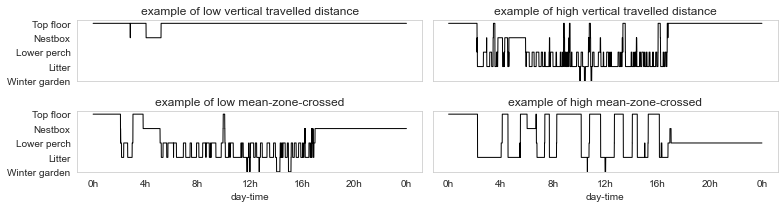

In [82]:
#keep 19!!
#for rs in range(15,50):
for rs in range(19,20):
    dico_selhen_date = {}
    random.seed(rs)
    #VTD
    x = df_LS[(df_LS['ExperimentID']=='Exp1')&(df_LS['VTDperhour']<=np.percentile(df_LS['VTDperhour'].dropna().tolist(),10))]
    x = x.iloc[random.sample(list(range(x.shape[0])),1)]
    dico_selhen_date[x['HenID'].values[0]] = (x['level'].values[0],'example of low vertical travelled distance')
    x = df_LS[(df_LS['ExperimentID']=='Exp1')&(df_LS['VTDperhour']>=np.percentile(df_LS['VTDperhour'].dropna().tolist(),90))]
    x = x.iloc[random.sample(list(range(x.shape[0])),1)]
    dico_selhen_date[x['HenID'].values[0]] = (x['level'].values[0],'example of high vertical travelled distance')

    #mean-zone-crosses
    x = df_LS[(df_LS['ExperimentID']=='Exp1')&(df_LS['zonecrossed2transition']<=np.percentile(df_LS['zonecrossed2transition'].dropna().tolist(),10))]
    x = x.iloc[random.sample(list(range(x.shape[0])),1)]
    dico_selhen_date[x['HenID'].values[0]] = (x['level'].values[0],'example of low mean-zone-crossed')
    x = df_LS[(df_LS['ExperimentID']=='Exp1')&(df_LS['zonecrossed2transition']>=np.percentile(df_LS['zonecrossed2transition'].dropna().tolist(),90))]
    x = x.iloc[random.sample(list(range(x.shape[0])),1)]
    dico_selhen_date[x['HenID'].values[0]] = (x['level'].values[0],'example of high mean-zone-crossed')
    display(dico_selhen_date)

    c = 2 ; l = 2
    img_w = 5.5
    img_h = 1.6
    dico_zone_order = {'1_Zone':0, '2_Zone':1, '3_Zone':2, '4_Zone':3, '5_Zone':4} #to sort the yaxis
    i = 0
    fig = plt.figure(figsize=(int(c*img_w), int(l*img_h)))
    for henid, (level,name) in dico_selhen_date.items():
        henID = henid.split('EXP1_')[-1]
        d = pd.Timestamp(level)
        d = dt.datetime(d.year,d.month,d.day)
        plt.subplot(l,c,i+1)
        plt.grid(False)
        i = i+1
        #keep the previous day to have a full time serie (not missing info before any transitions occured that day)
        #-8 for hens that did not moved during several consecutive days
        df_plt = df_rawmvt[((d-dt.timedelta(hours=24*8))<=df_rawmvt['date'])&(df_rawmvt['date']<=d)\
                           &(df_rawmvt['HenID']==henID)].copy()
        df_plt = df_plt.sort_values(['Timestamp']).copy()
        Daterange = pd.date_range(start=d-dt.timedelta(hours=10), end=d+dt.timedelta(hours=24), freq='S') 
        df_plt.set_index('Timestamp', inplace=True)
        df_plt_ = df_plt.reindex(Daterange, method='ffill').reset_index()
        df_plt_.rename(columns={'index':'Timestamp'}, inplace=True)
        #add date again, as the reindexing also extended the date
        df_plt_['date'] = df_plt_['Timestamp'].map(lambda x: dt.datetime.date(x))
        #keep only the date of interest
        df_plt_ = df_plt_[df_plt_['date']==dt.datetime.date(d)]
        #put xlabel into numbers for the ploting
        df_plt_['Zone'] = df_plt_['Zone'].map(lambda x: int(dico_zone_order[x]))    
        plt.plot(df_plt_['Timestamp'].tolist(), df_plt_['Zone'].tolist(), linewidth=1,color='black')#, color=pal_[henID])
        plt.title(name, size=12)#, color=pal_[henID]) #as small verification

        #remove x and y axis annotations
        plt.xticks([])
        plt.yticks([])
        #except: y-axis info on the right figures only
        if i%c==1:
            plt.yticks([0,1,2,3,4], ['Winter garden', 'Litter', 'Lower perch','Nestbox','Top floor'])
            plt.yticks(fontsize=10)
        #except: x-axis info on the bottom figures only
        if i>2:
            li_hour = pd.date_range(start = d,  end = d+dt.timedelta(days=1), freq = '4H') #xlabel: every 4h for readibility
            plt.xticks(li_hour, [str(i.hour)+'h' for i in li_hour], fontsize=10)    
            plt.xlabel('day-time')
            plt.yticks(fontsize=10)
        plt.ylim(0, 4.2)  
    plt.tight_layout() #avoid overlap
    plt.savefig(os.path.join(path_extracted_data_visual, 'Rawdata'+str(rs)+'.png'), bbox_inches='tight', dpi=400)
    plt.show()

li = df_rawmvt[(df_rawmvt['date']==d)&(df_rawmvt['HenID']==henID)]['Zone'].tolist()
li

#nbr of transitions
print(max(len(list(itertools.groupby(li, lambda x: x)))-1,0))
#nbr of indoor transitions
li_ = [i for i in li if i!='1_Zone']
print(max(len(list(itertools.groupby(li_, lambda x: x)))-1,0))

df_LS[(df_LS['HenID']==henid)&(df_LS['level']==d)][['VTDperhour','Total_number_indoor_transition','zonecrossed2transition','nbr_stays_1_Zone']]